<a href="https://colab.research.google.com/github/fluorescentlightpower/mifi_homework/blob/main/corr_reg_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание "Корреляционный и регрессионный анализ"

**Инструкции:**
- Скачайте файл `practical_module_dataset.csv` и заполните ячейки с заданиями кодом и выводами.
- В каждой задаче требуется:
  - короткая формулировка метода и обоснование,
  - код/расчёты,
  - результаты (коэффициенты, статистики, p-value, CI, R²),
  - промежуточный вывод.
- Используйте `numpy`, `pandas`, `scipy`, `statsmodels` или `scikit-learn` по желанию. При необходимости предобработки данных (очистка, удаление пропусков) укажите свои действия.
- Для воспроизводимости задан `np.random.seed` - не меняйте его!

**Формат сдачи:** `.ipynb` с заполненными ячейками, кодом и выводами.

In [1]:
# ячейка с импортами - дополняйте по своему желанию!
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy.stats import norm
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import gdown

np.random.seed(28)

In [2]:
url = "https://drive.google.com/uc?id=1-0Dmwo97kGYs5ITu_SyE98uX11tLl-UX"
gdown.download(url, "practical_module_dataset.csv", quiet=False)
df = pd.read_csv("practical_module_dataset.csv")
print("\n", "Число строк: ", df.shape[0], "Число столбцов: ", df.shape[1], sep="\n")
df.head()

Downloading...
From: https://drive.google.com/uc?id=1-0Dmwo97kGYs5ITu_SyE98uX11tLl-UX
To: /content/practical_module_dataset.csv
100%|██████████| 1.04k/1.04k [00:00<00:00, 2.53MB/s]



Число строк: 
30
Число столбцов: 
8


,id,age,height_cm,weight_kg,iq,tv_hours,study_hours,score
0,1,24,155.2,51.37,91,11,11.9,76.5
1,2,37,184.9,76.49,90,15,4.0,65.4
2,3,32,169.8,64.24,98,6,10.6,78.2
3,4,28,173.6,68.22,88,9,9.2,75.6
4,5,25,174.2,73.80,102,8,8.0,75.1


### Задание 1.
Выполните первичный анализ данных (EDA):
1. посмотрите на `describe()` для всех переменных,
2. проверьте наличие пропусков и типы данных через `info()`,
3. запишите наблюдения в текстовой ячейке.

In [3]:
df.describe()

,id,age,height_cm,weight_kg,iq,tv_hours,study_hours,score
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,29.400000,169.153333,62.734000,100.433333,12.266667,7.640000,73.400000
std,8.803408,6.672641,9.584101,9.201488,12.119188,3.832109,3.281568,8.253693
min,1.000000,18.000000,148.200000,44.750000,82.000000,6.000000,2.700000,58.900000
25%,8.250000,24.250000,163.250000,56.622500,91.000000,9.000000,4.975000,67.800000
50%,15.500000,29.000000,169.750000,63.675000,97.000000,12.000000,7.650000,74.300000
75%,22.750000,35.500000,174.100000,68.602500,109.750000,14.000000,9.450000,78.725000
max,30.000000,39.000000,185.800000,81.130000,132.000000,22.000000,14.400000,91.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           30 non-null     int64  
 1   age          30 non-null     int64  
 2   height_cm    30 non-null     float64
 3   weight_kg    30 non-null     float64
 4   iq           30 non-null     int64  
 5   tv_hours     30 non-null     int64  
 6   study_hours  30 non-null     float64
 7   score        30 non-null     float64
dtypes: float64(4), int64(4)
memory usage: 2.0 KB


1. В данных отсутствуют явные аномалии (выбросы), все значения типичны из общих соображений
2. Пропуски отсутствуют, все значения заполнены. Возраст, IQ, tv_hours - целые. Рост, вес, study_hours, score - с плавающей точкой, что не противоречит смыслу переменных.

### Задание 2.
1. Постройте scatter plot по признакам `height_cm` и `weight_kg`.
2. Посчитайте коэффициент Пирсона между `height_cm` и `weight_kg` и выведите его на экран.
3. Интерпретируйте результат и запишите в виде мини-вывода.

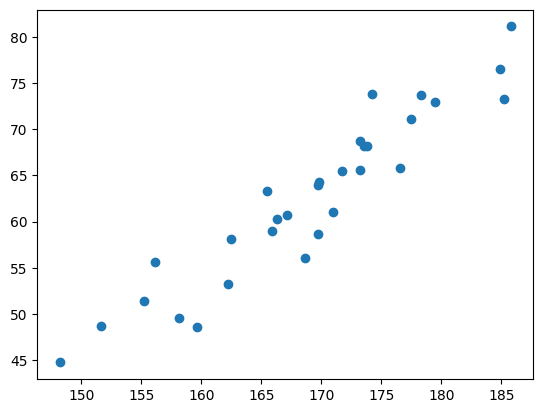

In [5]:
plt.scatter(df['height_cm'], df['weight_kg'])
plt.show()

In [6]:
corr_h_w = df['height_cm'].corr(df['weight_kg'], method='pearson')
print("Корреляция Пирсона между ростом и весом", corr_h_w)

Корреляция Пирсона между ростом и весом 0.9435332044875274


Коэффициент корреляции Пирсона между ростом и весом составляет приблизительно 0,94. Это означает очень сильную положительную линейную связь роста с весом. Чем больше рост, тем больше вес, что интуитивно непротиворечиво.

### Задание 3.
1. Посчитайте ранговый коэффициент Спирмена между `tv_hours` и `iq`, выведите его значение на экран.
2. Оцените, есть ли связь? Запишите наблюдения в виде короткого вывода.

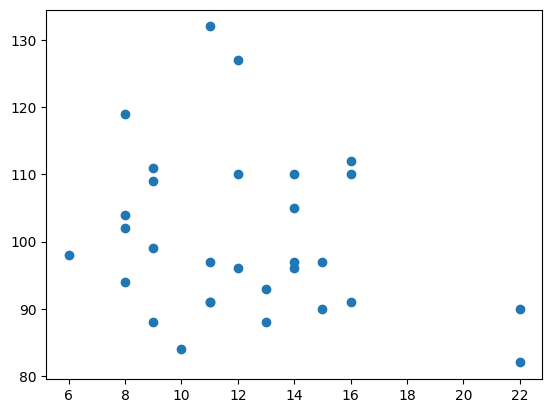

In [7]:
plt.scatter(df['tv_hours'], df['iq'])
plt.show()

In [8]:
corr_tv_iq = df['tv_hours'].corr(df['iq'], method='spearman')
print("Корреляция Спирмена между tv_hours и iq", corr_tv_iq)

Корреляция Спирмена между tv_hours и iq -0.21078163442252332


Коэффициент корреляции Спирмена между tv_hours и iq составляет приблизительно -0,21. Это означает слабую отрицательную монотонную связь (необязательно линейную). Чем больше часов перед телевизором, тем ниже IQ, но на не очень большой выборке $n=30$ эффект статистически не подтверждается. Интуитивно графически зависимость не видна.

### Задание 4.
1. Постройте простую линейную регрессию `weight_kg ~ height_cm`.
2. Найдите и выведите оценки коэффициентов (intercept и slope).
3. Рассчитайте и вывдите 95% доверительный интервал для наклона.
4. Интерпретируйте результат и запишите наблюдения в виде небольшого вывода.

In [9]:
X = sm.add_constant(df[["height_cm"]], has_constant="add")  # добавление константы, чтобы вычислить intercept
y = df["weight_kg"]

model = sm.OLS(y, X).fit()
print(model.summary())
print()
print(model.conf_int()) # по умолчанию alpha = 0.05


                            OLS Regression Results                            
Dep. Variable:              weight_kg   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     227.1
Date:                Sat, 06 Dec 2025   Prob (F-statistic):           5.80e-15
Time:                        22:06:59   Log-Likelihood:                -75.497
No. Observations:                  30   AIC:                             155.0
Df Residuals:                      28   BIC:                             157.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -90.4962     10.183     -8.887      0.0

Получен наклон (slope) 0,9059 и пересечение с осью Y (intercept) -90,4962. Признаки очень сильно связаны, наблюдается заметная мультиколлинеарность (наклон близок к 1). Пересечение с осью отрицательное, но не имеет практического смысла (вес человека роста 0). Коэффициент детерминации $R^2 \approx 0,89$, то есть 89% дисперсии веса объясняется изменениями роста. Доверительный интервал наклона (0,782744; 1,028988)

### Задание 5.
Для `height_cm = 175`:
1. вычислите предсказание веса,
2. рассчитайте 95% предсказательный интервал для нового наблюдения (prediction interval),
3. запишите небольшой вывод.

In [10]:
height = pd.DataFrame({"height_cm": [175]})
height = sm.add_constant(height, has_constant="add")

pred = model.get_prediction(height)
weight = pred.summary_frame(alpha=0.05)
print ("Предсказание веса для роста 175:", "\n", weight["mean"][0])
print ("95% доверительный интервал (confidence interval):", "\n", f"({weight["mean_ci_lower"][0]}; {weight["mean_ci_upper"][0]})")
print ("95% предсказательный интервал для нового наблюдения (prediction interval):", "\n", f"({weight["obs_ci_lower"][0]}; {weight["obs_ci_upper"][0]})")

Предсказание веса для роста 175: 
 68.03029562588918
95% доверительный интервал (confidence interval): 
 (66.66493343152666; 69.3956578202517)
95% предсказательный интервал для нового наблюдения (prediction interval): 
 (61.53068736316749; 74.52990388861087)


Предсказание веса имеет более широкий интервал, чем доверительный интервал для среднего в модели, потому что предсказание относится к конкретному человеку, а не к среднему по модели, и включает дополнительную неопределенность.

### Задание 6.
1. Постройте множественную регрессию `score ~ study_hours + iq + tv_hours + age`.
2. Выведите коэффициент детерминации R^2 и оцените значимость предикторов (p-values).
3. Запишите наблюдения в вывод.

In [19]:
X = sm.add_constant(df[["study_hours", "iq", "tv_hours", "age"]], has_constant="add")
y = df["score"]

model_mult = sm.OLS(y, X).fit()
print(model_mult.summary())
print()
print("p-value для каждого признака", model_mult.pvalues, sep="\n")
print()
print("Коэффициент детерминации:", model_mult.rsquared)

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     43.38
Date:                Sat, 06 Dec 2025   Prob (F-statistic):           6.73e-11
Time:                        22:07:30   Log-Likelihood:                -74.299
No. Observations:                  30   AIC:                             158.6
Df Residuals:                      25   BIC:                             165.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          45.6584      6.807      6.708      

Коэффициент детерминации $R^2 \approx 0,87$, то есть модель объясняет 87% вариабельности результата. Признак study_hours является наиболее значимым (очень малое p-value), IQ менее значим, но все же влияет на целевую переменную. tv-hours и age не дают статистически значимого вклада в объяснение score (p-value > 0.05). Константа, хотя и является значимой, нужна лишь для корректного построения модели и не дает практической информации.

### Задание 7.
1. Разделите данные на train/test (70/30), используйте `random_state=42`.
2. Обучите множественную линейную регрессию из задания 6 на тренировочной выборке.
3. И оцените RMSE на тестовой выборке - выведите её на экран.
4. Насколько модель хорошо предсказывает целевую переменную?

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df[["study_hours", "iq", "tv_hours", "age"]], df[["score"]], test_size=0.3, random_state=28)

X = sm.add_constant(X_train, has_constant="add")

model_mult_1 = sm.OLS(y_train, X).fit()
print(model_mult_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     26.77
Date:                Sat, 06 Dec 2025   Prob (F-statistic):           6.49e-07
Time:                        22:07:00   Log-Likelihood:                -52.693
No. Observations:                  21   AIC:                             115.4
Df Residuals:                      16   BIC:                             120.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          45.6331      8.904      5.125      

In [13]:
X = sm.add_constant(X_test, has_constant="add")
pred = model_mult_1.get_prediction(X)
score = pred.summary_frame(alpha=0.05)
rmse = root_mean_squared_error(y_test, score["mean"])
print("RMSE:", rmse)
q = rmse/(df["score"].max() - df["score"].min())
print("Отношение RMSE к диапазону score по всему набору данных", q)

RMSE: 2.734757874629437
Отношение RMSE к диапазону score по всему набору данных 0.08388827836286616


RMSE составляет приблизительно 3,79, что соответствует примерно 12% от диапазона значений целевой переменной - хорошая точность. $R^2 \approx 0,87$ - очень большая доля вариабельности объясняется моделью.

### Задание 8.
1. Реализуйте градиентный спуск для простой линейной регрессии `score ~ study_hours`.
2. Сравните полученные коэффициенты со `statsmodels`.

PS: выведите коэффициенты в обоих случаях на экран.

In [14]:
# Определение признаков и целевой переменной
X = df["study_hours"].to_numpy()
y = df["score"].to_numpy().reshape(-1, 1)

# Добавление вектора смещения как столбца из единиц
X = np.c_[np.ones((X.shape[0], 1)), X]

# Инициализация
y_len = y.shape[0]
w = np.zeros((X.shape[1], 1))
alpha = 0.005
n=0

def loss_f (y, y_pr):
    return np.mean((y - y_pr)**2)

while n<5000:
    y_pr = X @ w    # Предсказание на каждом шаге градиентного спуска
    grad = -2 / y_len * X.T @ (y - y_pr)    # Градиент на шаге
    w -= alpha * grad   # Обновление весов
    n += 1
    if n % 500 == 0:
        delta = loss_f (y, y_pr) # MSE на шаге
        print(f"Шаг: {n}, MSE: {delta}")
print()
print('Коэффициенты, градиентный спуск:', w, sep="\n")

Шаг: 500, MSE: 115.29908442772323
Шаг: 1000, MSE: 35.1920146499979
Шаг: 1500, MSE: 17.24838915564728
Шаг: 2000, MSE: 13.229097265744201
Шаг: 2500, MSE: 12.328793851513524
Шаг: 3000, MSE: 12.1271299117256
Шаг: 3500, MSE: 12.081958090795046
Шаг: 4000, MSE: 12.071839804856932
Шаг: 4500, MSE: 12.06957335404277
Шаг: 5000, MSE: 12.069065679193052

Коэффициенты, градиентный спуск:
[[56.00295893]
 [ 2.27649164]]


In [15]:
X = sm.add_constant(df[["study_hours"]], has_constant="add")  # добавление константы, чтобы вычислить intercept
y = df["score"]

model_hour = sm.OLS(y, X).fit()
print(model_hour.summary())
print()
print('Коэффициенты, statsmodels:', model_hour.params, sep="\n")

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     124.8
Date:                Sat, 06 Dec 2025   Prob (F-statistic):           7.92e-12
Time:                        22:07:00   Log-Likelihood:                -79.928
No. Observations:                  30   AIC:                             163.9
Df Residuals:                      28   BIC:                             166.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          56.0340      1.688     33.204      

In [16]:
print(f"Отклонение intercept: {(1-w[0]/model_hour.params['const'])*100}%")
print(f"Отклонение slope: {(1-w[1]/model_hour.params['study_hours'])*100}%")

Отклонение intercept: [0.05544753]%
Отклонение slope: [-0.15216288]%


Получены очень близкие значения коэффициентов регрессии (относительное отклонение по модулю не превышает 0,15%), что говорит о корректной реализации метода градиентного спуска

### Задание 9.
Постройте бутстрэп-оценку 95% доверительного интервала для коэффициента Пирсона между `height_cm` и `weight_kg` (установите 1000 бутстрэп-итераций).

Выведите границы ДИ на экран.

In [17]:
x = df["height_cm"].values
y = df["weight_kg"].values

boot_corr = []

for i in range(1000):
    xb, yb = resample(x, y, random_state=i*28)   # бутстрэп с возвращением
    boot_corr.append(np.corrcoef(xb, yb)[0, 1])

ci_lower, ci_upper = np.percentile(boot_corr, [2.5, 97.5])
r_obs = np.corrcoef(x, y)[0, 1]

print("Коэффициент корреляции Пирсона:", r_obs)
print("95% ДИ, бутстрэп:", f"({float(ci_lower)}; {float(ci_upper)})")


Коэффициент корреляции Пирсона: 0.9435332044875274
95% ДИ, бутстрэп: (0.8992066521776066; 0.9708139938384607)


При уровне значимости 0,05 корреляция Пирсона статистически значима, так как 0 не входит в довольно узкий доверительный интервал и весьма далек от него.

### Задание 10.
Постройте гистограмму остатков (residuals) для модели из задания 6.

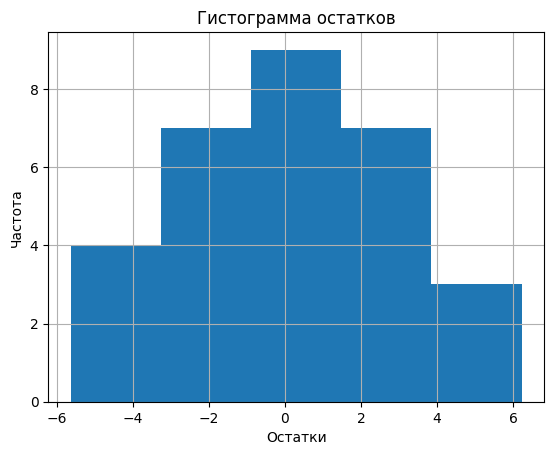

In [18]:
# Остатки модели из задания 6
residuals = model_mult.resid

plt.hist(residuals, bins=5)
plt.xlabel("Остатки")
plt.ylabel("Частота")
plt.grid(True)
plt.title("Гистограмма остатков")
plt.show()

plt.show()

Распределение остатков напоминает нормальное, но окончательный вывод для малой выборки по гистограмме сделать невозможно.

Удачи! Сохраните ноутбук, перезапустите все ячейки от начала до конца и прикрепите файл как ответ.